This data set is a clinical analise about **melanoma** diagnoses<p>
Legends for Clinical Diagnosis:<br>
   0 - Common Nevus;<br>
   1 - Atypical Nevus;<br>
   2 - Melanoma.<p>

**Binary Classification Melanoma (2) or not (0)**

Legends for Asymmetry:<br>
   0 - Fully Symmetric;<br>
   1 - Symetric in 1 axe;<br>
   2 - Fully Asymmetric;<p>

Legends for Pigment Network, Dots/Globules, Streaks, Regression Areas, and Blue-Whitish Veil: <br>
   A  - Absent(2);<br>
   AT - Atypical(0);<br>
   P  - Present(0);<br>
   T  - Typical(1).<p>

Legends for Colors: <br>
   1 - White;<br>
   2 - Red;<br>
   3 - Light-Brown;<br>
   4 - Dark-Brown;<br>
   5 - Blue-Gray;<br>
   6 - Black.<br>

In [1]:
import numpy as np 
import os
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
#reading file
def convertTxtToList():
    f=open("PH2_dataset.txt", "r")
    lines = f.readlines()
    returnList = []
    for line in lines:
        line = line.replace('||', '|')
        line = line.replace('\n', '')
        lista = list(str(line))
        if len(lista) > 0:
            lista[0] = ''
            lista[len(lista)-1] = ''
            newLine = ''.join(lista)
            arr = newLine.split('|')
            arr = [x.strip() for x in arr]
            if len(arr) > 1:
                returnList.append(arr)
        
    f.close()   
    return returnList

In [3]:
#loading list
txtFile = convertTxtToList()

In [4]:
len(txtFile)

201

In [5]:
txtFile

[['Name',
  'Histological Diagnosis',
  'Clinical Diagnosis',
  'Asymmetry',
  'Pigment Network',
  'Dots/Globules',
  'Streaks',
  'Regression Areas',
  'Blue-Whitish Veil',
  'Colors'],
 ['IMD003', '', '0', '0', 'T', 'A', 'A', 'A', 'A', '4'],
 ['IMD009', '', '0', '0', 'T', 'A', 'A', 'A', 'A', '3'],
 ['IMD016', '', '0', '0', 'T', 'T', 'A', 'A', 'A', '3  4'],
 ['IMD022', '', '0', '0', 'T', 'A', 'A', 'A', 'A', '3'],
 ['IMD024', '', '0', '0', 'T', 'A', 'A', 'A', 'A', '3  4'],
 ['IMD025', '', '0', '0', 'T', 'T', 'A', 'A', 'A', '3'],
 ['IMD035', '', '0', '2', 'T', 'A', 'A', 'A', 'A', '2  3'],
 ['IMD038', '', '0', '0', 'T', 'T', 'A', 'A', 'A', '4  6'],
 ['IMD042', '', '0', '0', 'T', 'T', 'A', 'A', 'A', '3  4'],
 ['IMD044', '', '0', '0', 'T', 'T', 'A', 'A', 'A', '4  5'],
 ['IMD045', '', '0', '0', 'T', 'T', 'A', 'A', 'A', '3'],
 ['IMD050', '', '0', '0', 'T', 'T', 'A', 'A', 'A', '3'],
 ['IMD092', '', '0', '0', 'T', 'T', 'A', 'A', 'A', '3  4'],
 ['IMD101', '', '0', '0', 'T', 'A', 'A', 'A', 'A',

In [6]:
#convert list to a dataframe
df = pd.DataFrame(txtFile[1:], columns=txtFile[0])
df.head(5)

,Name,Histological Diagnosis,Clinical Diagnosis,Asymmetry,Pigment Network,Dots/Globules,Streaks,Regression Areas,Blue-Whitish Veil,Colors
0,IMD003,,0,0,T,A,A,A,A,4
1,IMD009,,0,0,T,A,A,A,A,3
2,IMD016,,0,0,T,T,A,A,A,3 4
3,IMD022,,0,0,T,A,A,A,A,3
4,IMD024,,0,0,T,A,A,A,A,3 4


# Remove all rows that belongs to the ("1" Atypical Nevus)  
# keep only 0 (common Nevus ) & 2 (Melanoma)

In [7]:
index = df[df['Clinical Diagnosis'] == '1' ].index
# Delete these row indexes from dataFrame
df.drop(index, inplace=True)

In [8]:
df.shape

(120, 10)

# The Number of Classes is 2

In [9]:
df['Clinical Diagnosis'].unique()  #0 Common Nevus(Benign) , 2(Melanoma)

array(['0', '2'], dtype=object)

In [10]:
label = df['Clinical Diagnosis'].values.tolist()

In [11]:
imgs = df['Name'].values.tolist()

In [12]:
len(imgs)

120

In [13]:
img_name = []
path_img = []  

for img in imgs :
    for img_filename in os.listdir('PH2 Dataset images/'+ img +'/' + img+'_Dermoscopic_Image' ):
        path_img.append('PH2 Dataset images/'+ img +'/' + img+'_Dermoscopic_Image'+ '/' +img_filename)
        img_name.append(img_filename)

In [14]:
print(path_img)
print(img_name)

['PH2 Dataset images/IMD003/IMD003_Dermoscopic_Image/IMD003.bmp', 'PH2 Dataset images/IMD009/IMD009_Dermoscopic_Image/IMD009.bmp', 'PH2 Dataset images/IMD016/IMD016_Dermoscopic_Image/IMD016.bmp', 'PH2 Dataset images/IMD022/IMD022_Dermoscopic_Image/IMD022.bmp', 'PH2 Dataset images/IMD024/IMD024_Dermoscopic_Image/IMD024.bmp', 'PH2 Dataset images/IMD025/IMD025_Dermoscopic_Image/IMD025.bmp', 'PH2 Dataset images/IMD035/IMD035_Dermoscopic_Image/IMD035.bmp', 'PH2 Dataset images/IMD038/IMD038_Dermoscopic_Image/IMD038.bmp', 'PH2 Dataset images/IMD042/IMD042_Dermoscopic_Image/IMD042.bmp', 'PH2 Dataset images/IMD044/IMD044_Dermoscopic_Image/IMD044.bmp', 'PH2 Dataset images/IMD045/IMD045_Dermoscopic_Image/IMD045.bmp', 'PH2 Dataset images/IMD050/IMD050_Dermoscopic_Image/IMD050.bmp', 'PH2 Dataset images/IMD092/IMD092_Dermoscopic_Image/IMD092.bmp', 'PH2 Dataset images/IMD101/IMD101_Dermoscopic_Image/IMD101.bmp', 'PH2 Dataset images/IMD103/IMD103_Dermoscopic_Image/IMD103.bmp', 'PH2 Dataset images/IMD1

In [15]:
len(img_name)

120

# Replace Column (image) with the total name of dataset images (append .bmp to each image)

In [16]:
#convert list of images to dataframe 
df_img = pd.DataFrame(img_name ,columns=['Name'])

In [17]:
df_img

,Name
0,IMD003.bmp
1,IMD009.bmp
2,IMD016.bmp
3,IMD022.bmp
4,IMD024.bmp
...,...
115,IMD424.bmp
116,IMD425.bmp
117,IMD426.bmp
118,IMD429.bmp


In [18]:
df_label = pd.DataFrame(label ,columns=['Clinical Diagnosis'])
df_label

,Clinical Diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
115,2
116,2
117,2
118,2


In [19]:
df_label["Clinical Diagnosis"].replace({"2": "1"}, inplace=True)
df_label

,Clinical Diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
115,1
116,1
117,1
118,1


In [20]:
dataset = pd.concat([df_img, df_label], axis=1)
dataset.head()

,Name,Clinical Diagnosis
0,IMD003.bmp,0
1,IMD009.bmp,0
2,IMD016.bmp,0
3,IMD022.bmp,0
4,IMD024.bmp,0


# Divide the Dataset into train and test

In [21]:
X = dataset[:]
y = dataset.iloc[:,1]

In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: Clinical Diagnosis, Length: 120, dtype: object

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
print('XTrain shape = ',X_train.shape)
print('yTrain shape = ',y_train.shape)
print('XTest sets shape = ', X_test.shape)
print('yTest sets shape = ', y_test.shape)

XTrain shape =  (96, 2)
yTrain shape =  (96,)
XTest sets shape =  (24, 2)
yTest sets shape =  (24,)


In [25]:
X_train

,Name,Clinical Diagnosis
42,IMD108.bmp,0
12,IMD092.bmp,0
15,IMD112.bmp,0
114,IMD423.bmp,1
76,IMD397.bmp,0
...,...,...
106,IMD413.bmp,1
14,IMD103.bmp,0
92,IMD219.bmp,1
51,IMD199.bmp,0


In [26]:
y_train

42     0
12     0
15     0
114    1
76     0
      ..
106    1
14     0
92     1
51     0
102    1
Name: Clinical Diagnosis, Length: 96, dtype: object

# Resize All Images

In [27]:
import cv2 

for img in path_img :
    image = cv2.imread(img)
    image = cv2.resize(image, (150, 150)) 
    print(image.shape)

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 

In [28]:
Train_imgs = X_train['Name'].values.tolist()
Train_imgs

['IMD108.bmp',
 'IMD092.bmp',
 'IMD112.bmp',
 'IMD423.bmp',
 'IMD397.bmp',
 'IMD348.bmp',
 'IMD150.bmp',
 'IMD400.bmp',
 'IMD146.bmp',
 'IMD285.bmp',
 'IMD208.bmp',
 'IMD406.bmp',
 'IMD175.bmp',
 'IMD204.bmp',
 'IMD429.bmp',
 'IMD044.bmp',
 'IMD198.bmp',
 'IMD152.bmp',
 'IMD384.bmp',
 'IMD161.bmp',
 'IMD349.bmp',
 'IMD080.bmp',
 'IMD025.bmp',
 'IMD168.bmp',
 'IMD383.bmp',
 'IMD041.bmp',
 'IMD196.bmp',
 'IMD010.bmp',
 'IMD118.bmp',
 'IMD380.bmp',
 'IMD200.bmp',
 'IMD421.bmp',
 'IMD038.bmp',
 'IMD133.bmp',
 'IMD390.bmp',
 'IMD381.bmp',
 'IMD064.bmp',
 'IMD159.bmp',
 'IMD134.bmp',
 'IMD284.bmp',
 'IMD404.bmp',
 'IMD042.bmp',
 'IMD101.bmp',
 'IMD065.bmp',
 'IMD022.bmp',
 'IMD125.bmp',
 'IMD039.bmp',
 'IMD426.bmp',
 'IMD035.bmp',
 'IMD399.bmp',
 'IMD411.bmp',
 'IMD242.bmp',
 'IMD206.bmp',
 'IMD197.bmp',
 'IMD058.bmp',
 'IMD160.bmp',
 'IMD061.bmp',
 'IMD372.bmp',
 'IMD425.bmp',
 'IMD402.bmp',
 'IMD240.bmp',
 'IMD107.bmp',
 'IMD365.bmp',
 'IMD176.bmp',
 'IMD405.bmp',
 'IMD364.bmp',
 'IMD395.b

In [29]:
Test_imgs = X_test['Name'].values.tolist()

In [30]:
Train_Name = []
for img in Train_imgs : 
    Train_Name.append(img.strip('.bmp'))
print(Train_Name)

['IMD108', 'IMD092', 'IMD112', 'IMD423', 'IMD397', 'IMD348', 'IMD150', 'IMD400', 'IMD146', 'IMD285', 'IMD208', 'IMD406', 'IMD175', 'IMD204', 'IMD429', 'IMD044', 'IMD198', 'IMD152', 'IMD384', 'IMD161', 'IMD349', 'IMD080', 'IMD025', 'IMD168', 'IMD383', 'IMD041', 'IMD196', 'IMD010', 'IMD118', 'IMD380', 'IMD200', 'IMD421', 'IMD038', 'IMD133', 'IMD390', 'IMD381', 'IMD064', 'IMD159', 'IMD134', 'IMD284', 'IMD404', 'IMD042', 'IMD101', 'IMD065', 'IMD022', 'IMD125', 'IMD039', 'IMD426', 'IMD035', 'IMD399', 'IMD411', 'IMD242', 'IMD206', 'IMD197', 'IMD058', 'IMD160', 'IMD061', 'IMD372', 'IMD425', 'IMD402', 'IMD240', 'IMD107', 'IMD365', 'IMD176', 'IMD405', 'IMD364', 'IMD395', 'IMD182', 'IMD420', 'IMD367', 'IMD375', 'IMD410', 'IMD020', 'IMD162', 'IMD424', 'IMD009', 'IMD203', 'IMD144', 'IMD016', 'IMD147', 'IMD408', 'IMD403', 'IMD088', 'IMD418', 'IMD394', 'IMD085', 'IMD063', 'IMD435', 'IMD135', 'IMD371', 'IMD389', 'IMD413', 'IMD103', 'IMD219', 'IMD199', 'IMD407']


In [31]:
Test_Name = []
for img in Test_imgs  : 
    Test_Name.append(img.strip('.bmp'))
print(Test_Name)

['IMD142', 'IMD173', 'IMD024', 'IMD207', 'IMD156', 'IMD378', 'IMD392', 'IMD045', 'IMD105', 'IMD417', 'IMD132', 'IMD374', 'IMD050', 'IMD017', 'IMD091', 'IMD211', 'IMD419', 'IMD003', 'IMD090', 'IMD409', 'IMD379', 'IMD143', 'IMD177', 'IMD385']


In [32]:
imgTrain_path = []

for img in Train_Name :      
    imgTrain_path.append('PH2 Dataset images/'+ img +'/' + img+'_Dermoscopic_Image/' +img +'.bmp' )

print(imgTrain_path[0:5])

['PH2 Dataset images/IMD108/IMD108_Dermoscopic_Image/IMD108.bmp', 'PH2 Dataset images/IMD092/IMD092_Dermoscopic_Image/IMD092.bmp', 'PH2 Dataset images/IMD112/IMD112_Dermoscopic_Image/IMD112.bmp', 'PH2 Dataset images/IMD423/IMD423_Dermoscopic_Image/IMD423.bmp', 'PH2 Dataset images/IMD397/IMD397_Dermoscopic_Image/IMD397.bmp']


In [33]:
imgTest_path = []

for img in Test_Name :      
    imgTest_path.append('PH2 Dataset images/'+ img +'/' + img+'_Dermoscopic_Image/' +img +'.bmp' )

print(imgTest_path[0:5])

['PH2 Dataset images/IMD142/IMD142_Dermoscopic_Image/IMD142.bmp', 'PH2 Dataset images/IMD173/IMD173_Dermoscopic_Image/IMD173.bmp', 'PH2 Dataset images/IMD024/IMD024_Dermoscopic_Image/IMD024.bmp', 'PH2 Dataset images/IMD207/IMD207_Dermoscopic_Image/IMD207.bmp', 'PH2 Dataset images/IMD156/IMD156_Dermoscopic_Image/IMD156.bmp']


# Copying all train images to (train folder) & all test images to (test folder)

In [34]:
from os import path

try:
    os.makedirs('IMages_Test_ph2')
    os.makedirs('IMages_Train_ph2')
    
except:
    print ("Directory exists:" + str(path.exists('IMages_Train_ph2')))
    print ("Directory exists:" + str(path.exists('IMages_Test_ph2')))


Directory exists:True
Directory exists:True


In [35]:
import shutil 


for f in imgTrain_path :
    shutil.copy(f, 'IMages_Train_ph2')

for f in imgTest_path :
    shutil.copy(f, 'IMages_Test_ph2')

In [36]:
datagen = ImageDataGenerator(rescale=1 / 255.0)

train_generator = datagen.flow_from_dataframe(
    dataframe= X_train,
    directory='./IMages_Train_ph2/',
    x_col='Name',
    y_col="Clinical Diagnosis",
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=8,
    class_mode="binary",
    subset='training',
    shuffle=True,
    seed=42
)


test_generator=datagen.flow_from_dataframe(
    dataframe= X_test,
    directory='IMages_Test_ph2/',
    x_col='Name',
    y_col=None,
    batch_size=1,
    seed=42,
    shuffle=False,
    class_mode=None, 
    target_size=(150, 150 ) ,
    color_mode="rgb")

Found 96 validated image filenames belonging to 2 classes.
Found 24 validated image filenames.


In [37]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(150,150,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.add(Flatten())

In [38]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 18, 18, 64)        0

In [39]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
n_epochs = 20
history= model.fit_generator(train_generator,validation_data = test_generator,
                    epochs=n_epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
12/12 [==============================] - 1s 101ms/step - loss: 0.8620 - accuracy: 0.4271 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
12/12 [==============================] - 1s 88ms/step - loss: 0.6204 - accuracy: 0.6458 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
12/12 [==============================] - 1s 92ms/step - loss: 0.6237 - accuracy: 0.6146 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
12/12 [==============================] - 1s 92ms/step - loss: 0.5561 - accuracy: 0.7396 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
12/12 [==============================] - 1s 91ms/step - loss: 0.4270 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
12/12 [==============================] - 1s 88ms/step - loss: 0.3147 - accuracy: 0.8438 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/20
12/12 [===========

In [41]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


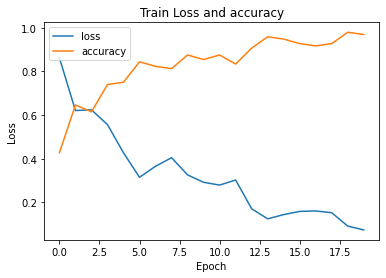

In [42]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

plt.title('Train Loss and accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()


In [43]:
test_generator.reset()
pred = model.predict_generator(test_generator,verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
24/24 [==============================] - 0s 5ms/step


In [44]:
predicted = np.argmax(pred,axis=1)

In [45]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [46]:
y_test = pd.DataFrame(y_test)

In [47]:
y_test

,Clinical Diagnosis
44,0
47,0
4,0
55,0
26,0
64,0
73,0
10,0
40,0
107,1


In [48]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in the same column
y_test['Clinical Diagnosis'] = labelencoder.fit_transform(y_test['Clinical Diagnosis'])
y_test['Clinical Diagnosis'] == 0

44      True
47      True
4       True
55      True
26      True
64      True
73      True
10      True
40      True
107    False
18      True
62      True
11      True
36      True
89     False
91     False
109    False
0       True
88     False
104    False
65      True
45      True
31      True
70      True
Name: Clinical Diagnosis, dtype: bool

**Accuracy**

In [49]:
from sklearn.metrics import accuracy_score

print("Accuracy : {}".format(accuracy_score(y_test, predicted)))

Accuracy : 0.75


**Balance Accuracy**

In [50]:
from sklearn.metrics import balanced_accuracy_score

balance = balanced_accuracy_score(y_test,predicted)
balance

0.5

**precision_score**  

In [51]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, predicted , average= 'micro')
precision 

0.75

**Recall (Sensitivity)**

In [52]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, predicted , average= 'micro')
recall 

0.75

**f1 score**

In [53]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predicted , average= 'micro')
f1

0.75

**Matthews correlation coefficient (MCC)**

In [54]:
from sklearn.metrics import matthews_corrcoef

MCC = matthews_corrcoef(y_test, predicted)
MCC 

0.0

In [55]:
y_test =y_test.values.tolist()
pred = predicted.tolist()

In [56]:
y_test

[[0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0]]

In [57]:
pred

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
print(cm)

[[18  0]
 [ 6  0]]


<AxesSubplot:>

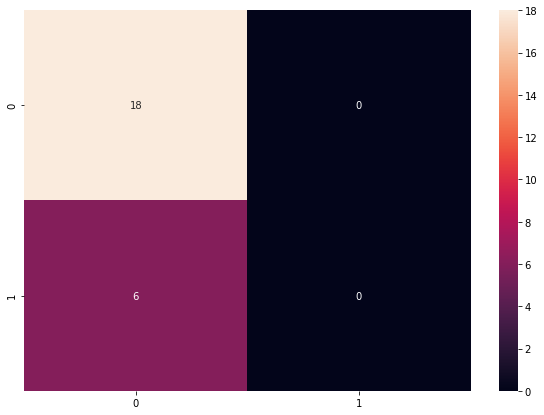

In [60]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)